<a href="https://colab.research.google.com/github/Chiwidude/ED1LAB1/blob/master/Comparaci%C3%B3n_Modelos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparación de Entorno**

In [ ]:
#ejecutar sino se tienen instaladas estas librerías
!pip install scikit-learn==1.1.3
!pip install -U imbalanced-learn
!pip install xgboost
!pip install seaborn
!pip install Pyspatialml
%pip install scikit-learn-intelex==2021.6.3
!pip install scikit-optimize

## Código de soporte

In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Ploteo validación cruzada k-iteraciones
Esta rutina permite dibujar la comparación de resultados de la validación cruzada entre resultados de entrenamiento y resultados de validación para su análisis.

In [ ]:
def plot_cvalidation(x_label, y_label, train_data, val_data, ax):
        '''Rutina para dibujar un gráfico de barras agrupado mostrando datos de entrenamiento y validación
          resultantes del modelo en cada iteración aplicando validación cruzada de k -iteraciones.
         Parametros
         ----------
         x_label: str, 
            Nombre del algoritmo utilizado. ej:Random Forest
          
         y_label: str, 
            Nombre de la métrica a visualizar. ej: precisión
         plot_title: str, 
            Título del gráfico. ej: 'Precisión del modelo'
         
         train_result: list, array
            Resultados de la métrica en fase de entrenamiento del modelo en la validación cruzada.
        
         val_result: list, array
            Resultados de la métrica en fase de validación del modelo en la validación cruzada.
         Returns
         -------
         Gráfico de barras agrupado mostrando el resultado de la métrica deseada en cada iteración.
        '''        
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        for x,y in zip(X_axis-0.2, train_data):
            label = "{:.2f}".format(y)
            ax.annotate(label,
                       (x,y),
                 textcoords="offset points",
                 xytext=(0,2),
                 ha='center',
                       fontsize=10)
        ax.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        for x,y in zip(X_axis+0.2, val_data):
            label = "{:.3f}".format(y)
            ax.annotate(label,
                       (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                       fontsize=10)
        ax.set_xticks(X_axis, labels)
        ax.set_xlabel(x_label, fontsize=10)
        ax.set_ylabel(y_label, fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(True)

### Ploteo matríz de confusión
Rutina que permite dibujar la matriz de confusión de los modelos entrenados para analizar los resultados contra los resultados esperados.

In [ ]:
def plot_matrix_c(real_data, pred_data, title, color):
    '''
    Rutina para dibujar matriz de confusión de un modelo, mostrando resultado de las predicciones del modelo
    contra los valores reales de los datos.
    Parametros
    ----------
    real_data: array,
    conjunto de datos reales utilizados para la validación del modelo, con las etiquetas de los datos
    
    pred_data: array,
    conjunto de datos predichos por el modelo
    
    title: str,
    título del gráfico
    
    color: matplotlib color o object(cmap) ,
    Color a aplicar al gráfico, puede ser un str o objeto de los disponibles en matplotlib
    '''
    matrix = confusion_matrix(real_data, pred_data)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:,np.newaxis]

    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
                cmap=color, linewidths=0.2)

    class_names = ['no deslizamiento','deslizamiento']
    tick_marks = np.arange(len(class_names)) + 0.4
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Clase predecida')
    plt.ylabel('Clase real')
    plt.title(title)
    plt.show()
    

### Ploteo gráfico - valor AUC-ROC

Rutina que dibuja el gráfico - valor AUC-ROC, comparando el resultado del modelo con parámetros predeterminados y el resultado con parámetros ajustados.

In [ ]:
def plot_auc_roc(real_data, pred_data_base, pred_data_adj):
    '''
    Rutina que dibuja los gráficos y valor AUC - ROC de los modelos con parámetros predeterminados
    y con parámetros ajustados.
    Parámetros
    ----------
    real_data: array, conjunto de datos reales para validación
    
    pred_data_base: array, conjunto de datos de las probabilidades de las predicciones hechas por el modelo con parámetros predeterminados
    
    pred_data_adj: array, conjunto de datos de las probabilidades de las predicciones hechas por el modelo  con parámetros ajustados
    '''
    fpr, tpr, _ = roc_curve(real_data, pred_data_base)

    auc = roc_auc_score(real_data, pred_data_base)

    #curva ROC parámetros pred.

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (16,6))

    axes[0].plot(fpr,tpr,label="AUC="+str(auc))
    axes[0].set_title('default params')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].legend(loc=4)

    fpr, tpr, _ = roc_curve(real_data, pred_data_adj)

    auc2 = roc_auc_score(real_data, pred_data_adj)

    #curva ROC parámetros ajustados

    axes[1].plot(fpr,tpr,label="AUC="+str(auc2))
    axes[1].set_title('params ajustados')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].legend(loc=4)
    plt.show()

### Búsqueda hiperparámetros
Esta rutina permite realizar la búsqueda de la mejor combinación de hiperparámetros dado un conjunto base, para el modelo indicado en los parámetros. Retornando la combinación encontrada por el módulo GridSearchCV

In [ ]:
def search_hyperparams(base_estimator, params_grid, train_data_x, train_data_y):
    '''
    Rutina que realiza la búsqueda de la mejor combinación de hiperparámetros para el modelo indicado.
    Retornando un diccionario con los hiperparámetros para la configuración del modelo.
    
    Parametros
    ----------
    estimator: modelo ML base  scikit-learn, instancia base del modelo para el cuál se hará la búsqueda de hiperparámetros.
    
    params_grid: dict, conjuntos de hiperpárametros para realizar la búsqueda de la mejor combinación
    
    train_data_x: array, conjunto de datos de entrenamiento para las variables independientes
    
    train_data_y: array, conjunto de datos de entrenamiento para la variable dependiente
    
    Retorna
    -------
    dict, Combinación de hiperpárametros encontrada por GridSearchCV
    '''
    search_model = GridSearchCV(estimator=base_estimator,
                                param_grid=params_grid,
                                cv=5, verbose=2, n_jobs = -1,
                          scoring=['f1','precision','recall'],
                          refit='recall')

    search_model.fit(train_data_x, train_data_y)
    
    return search_model.best_params_

### Entrenamiento Modelo
Esta rutina entrena la instancia de un modelo de ML scikit-learn, retornando el modelo ya entrenado.

In [ ]:
def train_model(model_configed, x_train_data, y_train_data):
    '''
    Rutina que entrena un modelo ML de scikit-learn ya configurado, con los datos indicados en los parámetros.
    
    Parámetros
    ----------
    model_configed: instancia modelo ML scikit-learn ya configurado con hiperparámetros sea ese el caso o una instancia
    predeterminada del modelo.
    
    x_train_data: array, datos de entrenamiento de las variables inpendientes
    
    y_train_data: array, datos de entrenamiento de las variables dependientes
    '''
    #Pipeline del modelo, realiza una normalización con StandarScaler y estos datos los pasa al modelo para entrenamiento
    model_ = Pipeline(
    [('scaling', StandardScaler()),
        ('classifier', model_configed)])
    model_.fit(x_train_data, y_train_data)
    return model_

### Ploteo mapa
Rutina que dibuja un mapa de la región con las predicciones realizadas por el modelo a través de pyspatialml.

In [ ]:
def plot_map(results):
    '''
    Rutina que dibuja mapa de las predicciones realizadas por el modelo.
    Parametros
    ----------
    results, rasterObject pyspatialML, resultados de la predicción realizada por el modelo
    '''
    fig, ax = plt.subplots(figsize=(9, 9))

    results.iloc[0].cmap = "Dark2"
    results.iloc[0].categorical = True
    results.iloc[0].plot(ax=ax, legend=True, categorical=True)
    plt.show()  

### Resultados validación cruzada
Ejecuta la evaluación de validación cruzada de un modelo dado, retornando un diccionario con los resultados de cada una de las iteraciones de la validación

In [ ]:
def cross_validation_results(estimator_, x_test_data, y_test_data, cv_):
    scores = cross_validate(estimator= estimator_,
    X = x_test_data,
    y = y_test_data,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    cv = cv_,
    return_train_score = True)
    return scores

# Ingeniería de Datos

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE
from pyspatialml import Raster
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [ ]:
#Datos variables independendientes

files = ["drive/MyDrive/Tesis/raster_curvatura/curvatura_r.tif","drive/MyDrive/Tesis/raster_elevacion/elevacion_r.tif","drive/MyDrive/Tesis/raster_pendiente/pendiente_r.tif","drive/MyDrive/Tesis/raster_perfil_curvatura/perfilc_r.tif",
         "drive/MyDrive/Tesis/raster_lluvia/lluvia_r.tif","drive/MyDrive/Tesis/raster_cobertura/cobertura_r.tif"]

#Carga de datos con rasterio
rasters =Raster(files)

In [ ]:
#Datos deslizamientos
raster_desli = rasterio.open('drive/MyDrive/Tesis/deslizamientos/raster/desli_lim.tif')

In [ ]:
#Combinación de datos de deslizamientos y variables independientes (DATAFRAME)
extracted_df = rasters.extract_raster(raster_desli)
#Depuración de Datos
extracted_df.dropna(inplace=True)
extracted_df

,value,curvatura_r,elevacion_r,pendiente_r,perfilc_r,lluvia_r,cobertura_r,geometry
0,0.0,0.50,1621.0,9.800000,0.473218,2392.033447,2.0,POINT (369009.824 1777200.007)
1,0.0,0.75,1574.0,20.196274,0.687335,2648.619141,2.0,POINT (373376.451 1777200.007)
2,0.0,1.00,1640.0,2.977056,1.483140,2869.323730,2.0,POINT (378470.851 1777200.007)
3,0.0,0.75,594.0,21.701746,-3.096038,2679.779541,2.0,POINT (404670.618 1777200.007)
4,0.0,0.25,391.0,22.294275,0.006878,2923.886230,2.0,POINT (417770.501 1777200.007)
...,...,...,...,...,...,...,...,...
6159,0.0,1.25,894.0,11.518590,-0.665087,2843.120117,7.0,POINT (451247.982 1594529.407)
6160,0.0,0.50,820.0,1.662445,-0.142286,3109.098877,7.0,POINT (449792.439 1593801.636)
6162,0.0,0.25,767.0,6.109069,0.095966,3204.624512,2.0,POINT (449064.668 1593073.865)
6163,0.0,0.50,779.0,2.679327,0.239556,3208.293701,7.0,POINT (449792.439 1593073.865)


## Sobremuestreo de Datos y separación de conjuntos

In [ ]:
#Separación de Datos inicial
#Sobremuestreo de datos
#separación variables independientes
X = extracted_df.drop(columns=['value','geometry'])

#separación variable dependiente (deslizamientos)
Y = extracted_df['value']


#el módulo SMOTE, realiza el sobremuestreo del conjunto de datos haciendo uso de la técnica Synthetic Minority Oversampling Technique (SMOTE)
smote = BorderlineSMOTE(random_state=30, n_jobs=-1)

X_smote, Y_smote = smote.fit_resample(X,Y)

#Se hace la separación de datos de entrenamiento y datos de validación para las variables independientes y la variable dependiente
x_train, x_test, y_train, y_test = train_test_split(X_smote,Y_smote,test_size=0.2, random_state=30)

/usr/local/lib/python3.8/dist-packages/imblearn/over_sampling/_smote/filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


## Análisis Linealidad variables

In [ ]:
deslizamientos = extracted_df[extracted_df['value'] == 1].drop(columns='geometry')
no_deslizamientos = extracted_df[extracted_df['value'] == 0].drop(columns='geometry').head(deslizamientos.shape[0])

columns = deslizamientos.drop(columns=['lluvia_r','value']).columns.values.tolist()

fig, axs = plt.subplots(2,3, sharex='all', figsize=(12,8))

for ax in axs.flat:
    if len(columns) > 0 :
        column = columns[-1]
    else: break
    ax.scatter(deslizamientos['lluvia_r'].values, deslizamientos[column].values, color='#FCCA46', marker='o', label='deslizamiento')
    ax.scatter(no_deslizamientos['lluvia_r'].values, no_deslizamientos[column].values, color='#3B8EA5', marker='x', label='no deslizamiento')
    ax.plot([deslizamientos['lluvia_l'].min(), deslizamientos['lluvia_r'].max()], [deslizamientos[column].min(), deslizamientos[column].max()], color='red')
    name = column.split('_')[0]
    ax.set_title(f'lluvia vs {name}')
    ax.legend()
    columns.pop()
plt.show()

# Pipeline Ciencia de Datos (ML)

In [ ]:
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Random Forest

In [ ]:
#Búsqueda mejor ajuste hiperparámetros
base_classifier = RandomForestClassifier()

n_estimators = [100,250,500,750,1000,1200]

max_depth = [50,100, 250, 350, 500]

min_samples_split = [5, 10, 15, 20, 30]

min_samples_leaf = [2,4,6,10]

max_leaf_nodes= [20, 50, 100,150,200]


params_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

params = search_hyperparams(base_classifier, params_grid, x_train, y_train)

params['n_jobs'] = -1

params

### Entrenamiento Hiperparámetros ajustados


In [ ]:
#Instancia modelo con hiperparámetros
classifier = RandomForestClassifier(**params)


rf = train_model(classifier, x_train, y_train)

In [ ]:
#Resultados predicción (pyspatialml)
result_rf = rasters.predict(estimator=rf,file_path="drive/MyDrive/Tesis/prediction.tif", progress=True)
#Resultados probabilidades predicción (pyspatialml)
result_probs = rasters.predict_proba(estimator=rf, progress=True)

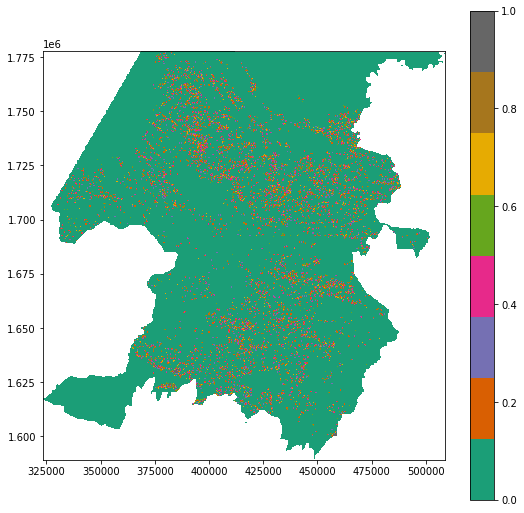

In [ ]:
#Plot mapa predicciones
plot_map(result_rf)

In [ ]:
#Estos resultados fueron utilizados para el análisis de métricas del modelo
#Resultados predicción (scikit-learn)
y_pred_ajustado = rf.predict(x_test)
#Resultados probabilidades predicción (scikit-learn)
y_ajustado_proba = rf.predict_proba(x_test)[::,1]

### Entrenamiento Hiperparámetros predeterminados


In [ ]:
#Instancia algoritmo hiperparámetros predeterminados
b_classifier = RandomForestClassifier(n_jobs=-1)

brf = train_model(b_classifier, x_train, y_train)

In [ ]:
#Resultados predicción (pyspatialml)
result_rfb = rasters.predict(estimator=brf, progress=True)
#Resultados probabilidades predicción (pyspatialml)
result_probs = rasters.predict_proba(estimator=brf, progress=True)

Se han truncado las últimas 5000 líneas del flujo de salida.
  warnings.warn(
 18%|█▊        | 240/1369 [01:09<05:44,  3.28it/s]/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
 18%|█▊        | 241/1369 [01:09<05:24,  3.47it/s]/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
 18%|█▊        | 242/1369 [01:09<05:07,  3.66it/s]/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
 18%|█▊        | 243/1369 [01:09<04:53,  3.84it/s]/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
 18%|█▊        | 2

In [ ]:
#Plot mapa predicciones
plot_map(result_rfb)

In [ ]:
#Estos resultados fueron utilizados para análisis de métricas del modelo
#Resultados predicción (scikit-learn)
y_pred_base = brf.predict(x_test)
#Resultados probabilidades predicción (scikit-learn)
y_pbase_proba = brf.predict_proba(x_test)[::,1]

### Métricas

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Matríz de Confusión + Métricas

In [ ]:
#Matriz de confusión parámetros ajustados
plot_matrix_c(y_test, y_pred_ajustado,'Matriz de Confusión Random Forest (hparam ajustados)',plt.cm.Blues)

In [ ]:
#Resultado métricas de clasificación modelo parámetros ajustados
print(classification_report(y_test, y_pred_ajustado, digits=5))

              precision    recall  f1-score   support

         0.0    0.94211   0.97822   0.95983      1148
         1.0    0.97756   0.94041   0.95863      1158

    accuracy                        0.95924      2306
   macro avg    0.95984   0.95932   0.95923      2306
weighted avg    0.95991   0.95924   0.95923      2306



#### AUC - ROC

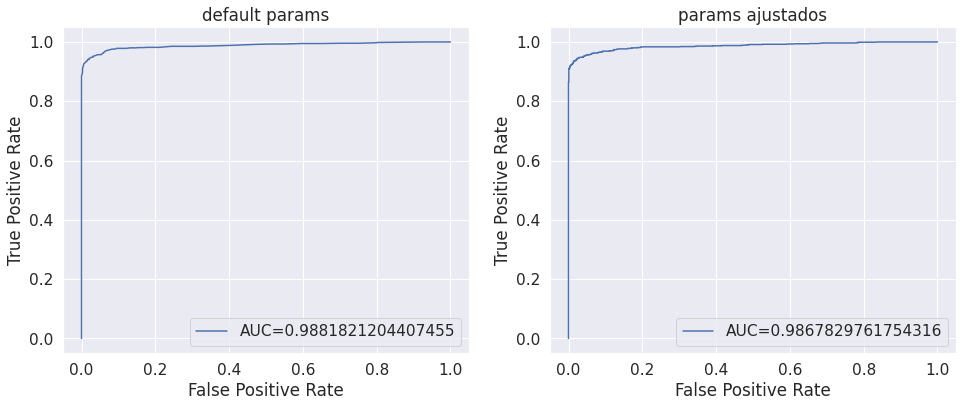

In [ ]:
plot_auc_roc(y_test, y_pbase_proba, y_ajustado_proba)

#### Validación Cruzada k - iteraciones

In [ ]:
#Validación modelo hiperparámetros pred.
base_scores = cross_validation_results(brf, x_test, y_test, 5)
for i, item in base_scores.items():
    print(f'{i} media: {item.mean()}')

fit_time media: 0.15105538368225097
score_time media: 0.011102962493896484
test_accuracy media: 0.8842155675127475
train_accuracy media: 0.9995663368781192
test_precision media: 0.8826073227223288
train_precision media: 1.0
test_recall media: 0.8877556351694282
train_recall media: 0.9991363021055403
test_f1 media: 0.8850675460584796
train_f1 media: 0.9995679178099206


In [ ]:
#Validación modelo hiperparámetros ajustados
scores = cross_validation_results(rf, x_test, y_test, 5)
for i, item in scores.items():
    print(f'{i} media: {item.mean()}')

fit_time media: 0.13844513893127441
score_time media: 0.010818767547607421
test_accuracy media: 0.8785728371411669
train_accuracy media: 0.9957718874368787
test_precision media: 0.876090583058448
train_precision media: 0.9993485336899408
test_recall media: 0.8843036274070757
train_recall media: 0.9922276509141404
test_f1 media: 0.8798284251256302
train_f1 media: 0.9957749362860258


<ipython-input-4-b253be5b629d>:43: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(X_axis, labels)


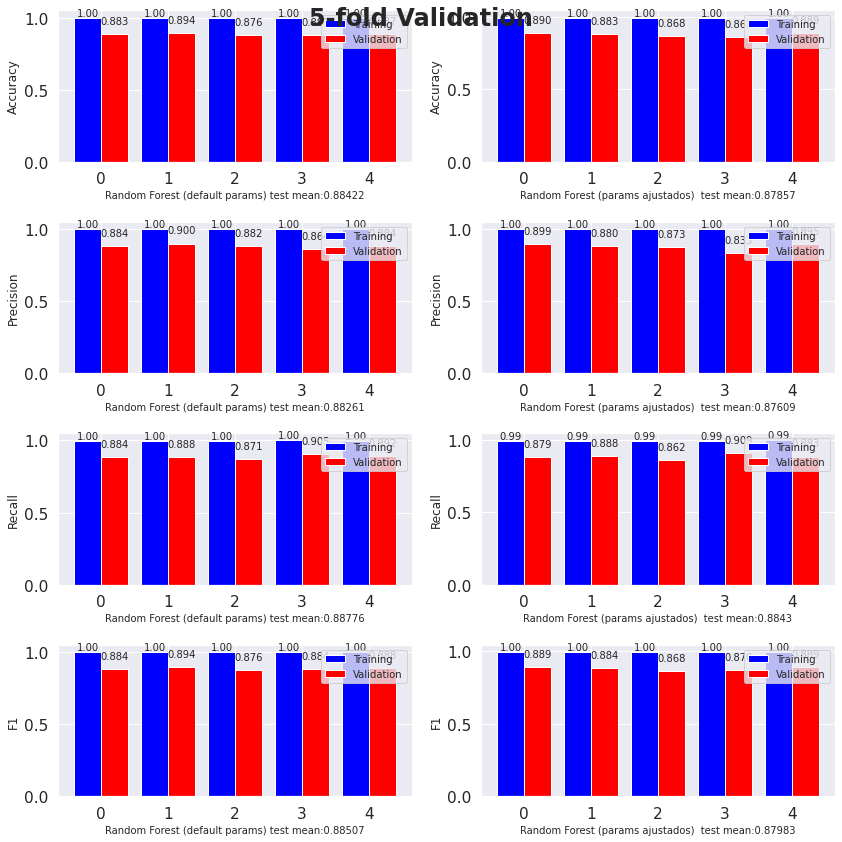

In [ ]:
#Plot comparativa validación cruzada k - iteraciones RF
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12))

metrics = ['accuracy', 'precision','recall','f1']

figure.suptitle('5-fold Validation', fontsize=24, fontweight='bold')

for index, metric in enumerate(metrics):
    pivot = 0
    plot_cvalidation('Random Forest (default params) test mean:'+str(round(base_scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',base_scores[f'train_{metric}'],base_scores[f'test_{metric}'], axes[index,pivot])
    pivot+=1
    plot_cvalidation(f'Random Forest (params ajustados)  test mean:'+str(round(scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',scores[f'train_{metric}'],scores[f'test_{metric}'], axes[index,pivot])
figure.tight_layout()
plt.show()

## Support Vector Machine

In [ ]:
#Búsqueda hiperparámetros
param_grid = {'C': [1,2,2.5,3,4,5],
              'gamma': [1,1.25,1.50,1.75],
              'kernel': ['rbf','linear','sigmoid']}
base_svm = svm.SVC()

params_svm = search_hyperparams(base_svm, param_grid, x_train, y_train)

params_svm['probability'] = True

params_svm

Fitting 5 folds for each of 72 candidates, totalling 360 fits


### Entrenamiento Hiperparámetros ajustados

In [ ]:
#Instacia de modelo con hiperparámetros
svmc = svm.SVC(**params_svm)

svc = train_model(svmc, x_train, y_train)

In [ ]:
#Resultado Predicción (pyspatialml)
result = rasters.predict(estimator=svc, progress=True)
#Resultado Probabilidades Predicción (pyspatialml)
result_probs = rasters.predict_proba(estimator=svc, progress=True)

In [ ]:
#Plot mapa con predicciones
plot_map(result)

In [ ]:
#Estos resultados fueron utilizados para el análisis de métricas del modelo
#Resultados predicción (scikit-learn)
y_pred_svm = svc.predict(x_test)
#Resultados probabilidades predicción (scikit-learn)
y_svm_proba = svc.predict_proba(x_test)[::,1]

### Entrenamiento Hiperparámetros predeterminados

In [ ]:
#Instancia modelo parámetros predeterminados
base_svm = svm.SVC(probability=True)
base_svm = train_model(base_svm, x_train, y_train)

In [ ]:
#Resultado Predicción (pyspatialml)
resultb = rasters.predict(estimator=base_svm, progress=True)
#Resultado Probabilidades Predicción (pyspatialml)
result_probs = rasters.predict_proba(estimator=base_svm, progress=True)

In [ ]:
#Plot mapa predicciones
plot_map(resultb)

In [ ]:
#Estos resultados fueron utilizados para el análisis de métricas del modelo
#Resultados predicción (scikit-learn)
y_pred_svmb = base_svm.predict(x_test)
#Resultados probabilidades predicción (scikit-learn)
y_svmb_proba = base_svm.predict_proba(x_test)[::,1]

### Métricas

#### Matríz de Confusión + métricas

In [ ]:
#Resultado métricas de validación modelo hparams. ajustados
print(classification_report(y_test, y_pred_svmb,digits=5))

In [ ]:
#Matriz confusión modelo hparams. ajustados
plot_matrix_c(y_test, y_pred_svm,'Matriz de Confusión SVM (hparam ajustados)',plt.cm.Blues)

#### AUC - ROC

In [ ]:
#Gráfico comparativa AUC - ROC
plot_auc_roc(y_test, y_svmb_proba, y_svm_proba)

#### Validación cruzada k-iteraciones

In [ ]:
#Validación modelo hparámetros pred.
base_scores = cross_validation_results(base_svm, x_test, y_test, 5)

for i, item in base_scores.items():
    print(f'{i} media: {item.mean()}')

In [ ]:
#Validación modelo hparámetros ajustados
scores = cross_validation_results(svc, x_test, y_test, 5)

for i, item in scores.items():
    print(f'{i} media: {item.mean()}')

In [ ]:
#Comparación validación cruzada k-iteraciones
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12))

metrics = ['accuracy', 'precision','recall','f1']

figure.suptitle('5-fold Validation', fontsize=24, fontweight='bold')

for index, metric in enumerate(metrics):
    pivot = 0
    plot_cvalidation('SVM (default params) test mean:'+str(round(base_scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',base_scores[f'train_{metric}'],base_scores[f'test_{metric}'], axes[index,pivot])
    pivot+=1
    plot_cvalidation(f'SVM (params ajustados)  test mean:'+str(round(scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',scores[f'train_{metric}'],scores[f'test_{metric}'], axes[index,pivot])
figure.tight_layout()
plt.show()

## Selección de Variables (*Feature Selection*) [Ingeniería de Datos] + [Ciencia de Datos]

### Análisis de Correlación

In [ ]:
x_stats = X_smote.copy()

x_corr = x_stats.corr(method = "spearman")

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(x_corr, vmin=-1, 
                      vmax=1, annot=True)
plt.title("Spearman Correlation")

### Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train, y_train)

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
 print('Feature %d: %s' % (i, fs.feature_names_in_[i]))
# plot the scores
plt.bar([i for i in fs.feature_names_in_], fs.scores_)
plt.show()
plt.rcParams.update({'font.size': 9})

### *Feature Importance Random Forest*

In [ ]:
plt.bar([i for i in rf[0].get_feature_names_out()], rf[1].feature_importances_)
plt.show()
plt.rcParams.update({'font.size': 9})

### Random Forest (*Feature Selection*)

In [ ]:
#Búsqueda mejor ajuste hiperparámetros
base_classifier = RandomForestClassifier()

n_estimators = [100,250,500,750,1000,1200]

max_depth = [50,100, 250, 350, 500]

min_samples_split = [5, 10, 15, 20, 30]

min_samples_leaf = [2,4,6,10]

max_leaf_nodes= [20, 50, 100,150,200]


params_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

params = search_hyperparams(base_classifier, params_grid, x_train.drop(columns=['perfilc_r']), y_train)


params['n_jobs'] = -1

params

In [ ]:
#Entrenamiento modelo con variables seleccionadas
fs_classifier = RandomForestClassifier(**params)
rf_fs = train_model(fs_classifier, x_train.drop(columns=['perfilc_r']), y_train)

#Resultado predicción (scikit-learn)
y_pred_ajustado_fs = rf_fs.predict(x_test.drop(columns=['perfilc_r']))
#Resultado probabilidades predicción (scikit-learn)
y_ajustado_proba_fs = rf_fs.predict_proba(x_test.drop(columns=['perfilc_r']))[::,1]

#### Métricas

In [ ]:
print(classification_report(y_test, y_pred_ajustado_fs, digits=5))

##### Matriz confusión

In [ ]:
plot_matrix_c(y_test, y_pred_ajustado_fs,'Matriz de Confusión Random Forest (variables selecionadas)',plt.cm.Blues)

##### AUC - ROC

In [ ]:
plot_auc_roc(y_test, y_ajustado_proba_fs, y_ajustado_proba)

#### Validación Cruzada

In [ ]:
base_scores = cross_validation_results(rf_fs, x_test.drop(columns=['perfilc_r']), y_test, 5)
for i, item in base_scores.items():
    print(f'{i} media: {item.mean()}')

In [ ]:
scores = cross_validation_results(rf, x_test.drop(columns=['perfilc_r']), y_test, 5)
for i, item in scores.items():
    print(f'{i} media: {item.mean()}')

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12))

metrics = ['accuracy', 'precision','recall','f1']

figure.suptitle('5-fold Validation', fontsize=24, fontweight='bold')

for index, metric in enumerate(metrics):
    pivot = 0
    plot_cvalidation('Random Forest (variables seleccionadas) test mean:'+str(round(base_scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',base_scores[f'train_{metric}'],base_scores[f'test_{metric}'], axes[index,pivot])
    pivot+=1
    plot_cvalidation(f'Random Forest (todas las variables)  test mean:'+str(round(scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',scores[f'train_{metric}'],scores[f'test_{metric}'], axes[index,pivot])
figure.tight_layout()
plt.show()

### Support Vector Machine (*Feature Selection*)

In [ ]:
#Búsqueda hiperparámetros
param_grid = {'C': [1,2,2.5,3,4,5],
              'gamma': [1,1.25,1.50,1.75],
              'kernel': ['rbf','linear','sigmoid']}
base_svm = svm.SVC()

params_svm = search_hyperparams(base_svm, param_grid, x_train.drop(columns=['perfilc_r']), y_train)

params_svm['probability'] = True

params_svm

In [ ]:
#Entrenamiento modelo con variables seleccionadas
svmc_fs = svm.SVC(**params_svm)

svc_fs = train_model(svmc_fs, x_train.drop(columns=['perfilc_r']), y_train)

#Resultados predicción (scikit-learn)
y_pred_svm_fs = svc_fs.predict(x_test.drop(columns=['perfilc_r']))
#Resultados probabilidades predicción (scikit-learn)
y_svm_proba_fs = svc_fs.predict_proba(x_test.drop(columns=['perfilc_r']))[::,1]

#### Métricas

In [ ]:
print(classification_report(y_test, y_pred_svm_fs, digits=5))

##### Matriz Confusión

In [ ]:
plot_matrix_c(y_test, y_pred_svm_fs,'Matriz de Confusión Random Forest (variables seleccionadas)',plt.cm.Blues)

##### AUC - ROC

In [ ]:
plot_auc_roc(y_test, y_pred_svm_fs, y_pred_svm)

##### Validación Cruzada

In [ ]:
base_scores = cross_validation_results(svc_fs, x_test.drop(columns=['perfilc_r']), y_test, 5)
for i, item in base_scores.items():
    print(f'{i} media: {item.mean()}')

In [ ]:
scores = cross_validation_results(svc, x_test.drop(columns=['perfilc_r']), y_test, 5)
for i, item in scores.items():
    print(f'{i} media: {item.mean()}')

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12))

metrics = ['accuracy', 'precision','recall','f1']

figure.suptitle('5-fold Validation', fontsize=24, fontweight='bold')

for index, metric in enumerate(metrics):
    pivot = 0
    plot_cvalidation('SVM (variables seleccionadas) test mean:'+str(round(base_scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',base_scores[f'train_{metric}'],base_scores[f'test_{metric}'], axes[index,pivot])
    pivot+=1
    plot_cvalidation(f'SVM (todas las variables)  test mean:'+str(round(scores[f'test_{metric}'].mean(),5)),f'{metric.capitalize()}',scores[f'train_{metric}'],scores[f'test_{metric}'], axes[index,pivot])
figure.tight_layout()
plt.show()